**Day 3: Convolutional Neural Networks (CNN) Assignment.**
### Step 1: Load the Dataset  
We load the Fashion-MNIST dataset which contains images of clothing items.  

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


## Step 2: Preprocess the Data
We normalize the pixel values to range [0, 1] for faster training and better convergence.  
Additionally, we reshape the input to `(28, 28, 1)` since CNN layers expect channel information.  
We also one-hot encode the labels for multi-class classification.


In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Step 3: Build the CNN Model
We define a simple CNN architecture that includes:
- Convolutional layers to extract spatial features,
- MaxPooling layers to reduce dimensions,
- Dense (fully connected) layers with softmax activation for final classification into 10 classes.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


## Step 4: Compile the Model
We compile the model with:
- Optimizer (e.g., Adam) for efficient gradient descent,
- Categorical Crossentropy loss since this is a multi-class classification problem,
- Accuracy as the performance metric.

---



In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



## Step 5: Train the Model
We train the CNN on the training dataset while validating on the test set.  
Training helps the CNN learn filters (kernels) that detect important features such as edges, textures, and shapes.


In [5]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - accuracy: 0.6936 - loss: 0.8484 - val_accuracy: 0.8563 - val_loss: 0.3946
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.8493 - loss: 0.4210 - val_accuracy: 0.8754 - val_loss: 0.3375
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.8723 - loss: 0.3573 - val_accuracy: 0.8842 - val_loss: 0.3067
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.8831 - loss: 0.3226 - val_accuracy: 0.8904 - val_loss: 0.2970
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.8927 - loss: 0.2936 - val_accuracy: 0.8895 - val_loss: 0.2937
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9010 - loss: 0.2745 - val_accuracy: 0.8969 - val_loss: 0.2809
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9072 - loss: 0.2558 - val_accuracy: 0.9072 - val_loss: 0.2566
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9104 - loss: 0.2411 - 

## Step 6: Confusion Matrix & Classification Report
We generate a confusion matrix and classification report to analyze model performance across different categories.  
This helps identify which classes the model predicts well and where it struggles.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


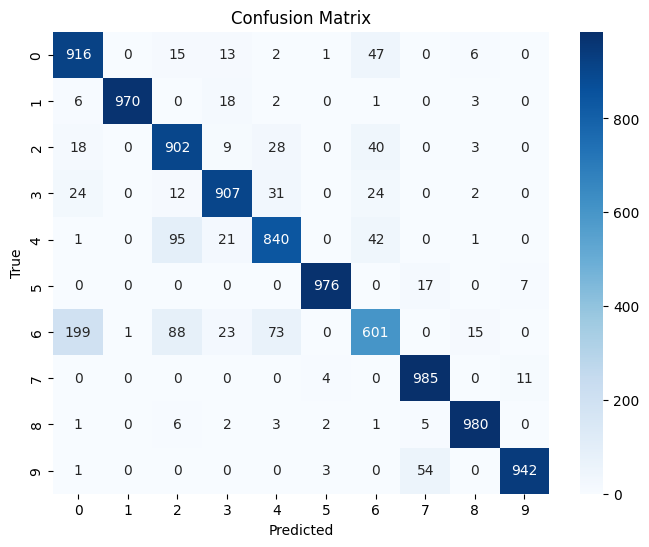

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.81      0.90      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.84      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.60      0.68      1000
           7       0.93      0.98      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Show classification report separately after heatmap
report = classification_report(y_true, y_pred_classes, digits=2)
print("Classification Report:\n")
print(report)

## Step 7: Accuracy Visualization
We plot training and validation accuracy over epochs.  
This visualization helps us understand the learning behavior of the model and detect issues like overfitting or underfitting.


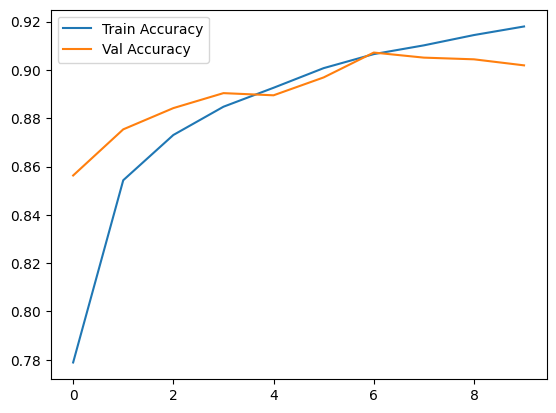

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
